# Análise de Vendas Amazon

**Introdução:**
A análise estratégica de desempenho é uma ferramenta essencial para empresas como a Amazon, fornecendo insights valiosos sobre suas operações e direcionando decisões informadas. Neste contexto, a compreensão profunda das vendas é fundamental para a elaboração e execução de estratégias eficazes. Neste estudo, exploramos diversos aspectos do desempenho de vendas da Amazon, desde a distribuição de vendas até as tendências temporais, a segmentação por categoria, região e produto, bem como o comportamento de vendas ao longo da semana e a taxa de crescimento mensal. Por meio de visualizações gráficas e análises, buscamos extrair insights significativos que orientam a Amazon na maximização de sua eficiência operacional, rentabilidade e satisfação do cliente.


# Bibiliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dados = pd.read_csv('/content/drive/MyDrive/Projeto/train.csv')

dados.head()

Mounted at /content/drive


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Pandas (pd):**
Pandas é uma biblioteca popular de análise de dados em Python.
Oferece estruturas de dados poderosas e fáceis de usar, como DataFrame e Series, que permitem manipular e analisar dados de forma eficiente.
Fornece funcionalidades para carregar, limpar, transformar e analisar dados tabulares de forma rápida e intuitiva.

**Matplotlib.pyplot (plt):**
Matplotlib é uma biblioteca de visualização de dados em Python.
Pyplot é uma interface para a Matplotlib que fornece uma maneira conveniente de criar gráficos e visualizações de dados.
Permite criar uma ampla variedade de gráficos, incluindo gráficos de linha, de dispersão, de barras, de pizza, histogramas, entre outros.

**Seaborn (sns):**
Seaborn é uma biblioteca de visualização de dados em Python baseada na Matplotlib.
Ela fornece uma interface de alto nível para criar visualizações estatísticas atraentes e informativas.
Seaborn é especialmente útil para criar gráficos estatísticos complexos, como gráficos de dispersão com regressão, mapas de calor, boxplots, entre outros.
Além disso, Seaborn integra-se bem com estruturas de dados do Pandas, facilitando a criação de visualizações a partir de DataFrames.

**Warnings:**
Warnings é um módulo integrado do Python que controla o comportamento de avisos emitidos pelo interpretador.
Ele fornece funcionalidades para controlar como os avisos são tratados, como suprimi-los, exibi-los como exceções, entre outros.
Pode ser útil para controlar o fluxo de saída durante o desenvolvimento e depuração de código, especialmente quando se trabalha com bibliotecas que emitem avisos que não são críticos para o funcionamento do programa.

# Colunas dos Dados

**Row ID:**
* Este é um identificador único para cada linha no conjunto de dados.
* É útil para referenciar uma linha específica, mas geralmente não contém informações significativas sobre os dados em si.



**Order ID:**

* Este é um identificador único para cada pedido feito.
* Ele é usado para rastrear e identificar pedidos individuais dentro do conjunto de dados.

**Order Date:**
* Esta é a data em que o pedido foi feito.
* Ela indica quando o pedido foi feito pelo cliente.

**Ship Date:**
* Esta é a data em que o pedido foi enviado.
* Ela indica quando o pedido foi realmente enviado para entrega após o pedido ter sido feito.

**Ship Mode:**
* Este é o modo de envio escolhido para o pedido.
* Ele pode incluir opções como entrega padrão, entrega expressa, retirada na loja, entre outros.

**Customer ID:**
* Este é um identificador único para cada cliente.
* Ele é usado para rastrear e identificar clientes individuais dentro do conjunto de dados.

**Customer Name:**
* Este é o nome do cliente que fez o pedido.
* Ele fornece informações sobre quem fez o pedido.

**Segment:**
* Este é o segmento de mercado ao qual o cliente pertence.
* Ele pode incluir segmentos como consumidor, empresa, governo, entre outros.

**Country:**
* Este é o país onde o pedido foi feito.
* Ele indica o país de origem do cliente que fez o pedido.

**City:**
* Esta é a cidade onde o pedido foi feito.
* Ela indica a cidade de origem do cliente que fez o pedido.

**State:**
* Este é o estado onde o pedido foi feito (se aplicável).
* Ele fornece informações adicionais sobre a localização do cliente, além da cidade e do país.

**Postal Code:**
* Este é o código postal onde o pedido foi feito.
* Ele fornece informações específicas sobre a localização do cliente, geralmente em nível de rua ou bairro.

**Region:**
* Esta é a região geográfica onde o pedido foi feito.
* Pode ser uma divisão geográfica mais ampla, como continente, país ou estado.

**Product ID:**
* Este é um identificador único para cada produto.
* Ele é usado para rastrear e identificar produtos individuais dentro do conjunto de dados.

**Category:**
* Esta é a categoria geral à qual o produto pertence.
* Pode incluir categorias como eletrônicos, móveis, suprimentos de escritório, entre outros.

**Sub-Category:**
* Esta é a subcategoria à qual o produto pertence.
* Ela fornece uma descrição mais detalhada do tipo de produto dentro de uma categoria.

**Product Name:**
* Este é o nome do produto específico.
* Ele fornece informações detalhadas sobre o produto que foi comprado.

**Sales:**
* Este é o valor de vendas do produto.
* Ele indica o valor monetário total do produto vendido em uma transação específica.

# Objetivos

1. Analisar o volume total de vendas ao longo do tempo.
2. Identificar tendências de crescimento ou decrescimento das vendas.
3. Avaliar a sazonalidade das vendas, incluindo variações mensais ou sazonais.
4. Explorar padrões de vendas em relação a diferentes categorias de produtos.
5. Investigar fatores que possam influenciar as vendas, como promoções, feriados, eventos sazonais, etc.
6. Visualizar os resultados de forma clara e intuitiva para facilitar a interpretação dos dados.



# Metodologoia

1. Carregamento dos Dados: Os dados de vendas da Amazon são carregados a partir de um conjunto de dados disponível, que inclui informações como datas de pedidos, valores de vendas, categorias de produtos, etc.
2. Limpeza e Preparação dos Dados: Os dados são limpos e preparados para análise, o que pode incluir tratamento de valores ausentes, correção de erros de dados, entre outros.
3. Análise Exploratória de Dados: São realizadas diversas análises exploratórias para entender a distribuição dos dados, identificar outliers e padrões iniciais nos dados.
4. Análise Temporal: As vendas ao longo do tempo são analisadas para identificar tendências, sazonalidades e padrões de comportamento.
5. Análise de Categorias: As vendas são analisadas por categorias de produtos para entender quais segmentos estão contribuindo mais para o total de vendas e se há variações significativas entre diferentes categorias.
6. Visualização dos Resultados: Os resultados são visualizados por meio de gráficos e tabelas, o que facilita a interpretação e comunicação dos insights obtidos.
7. Conclusões e Recomendações: São tiradas conclusões com base na análise realizada e são feitas recomendações para possíveis ações futuras com base nos insights obtidos.

**Benefícios Esperados**

1. Compreensão mais profunda do desempenho das vendas da Amazon.
2. Identificação de oportunidades de otimização e melhoria.
3. Base para tomada de decisões estratégicas, como ajuste de preços, planejamento de estoque, entre outros.
4. Melhoria da eficiência operacional e aumento da lucratividade.

# Análise Estratégica de Desempenho: Insights de Vendas da Amazon

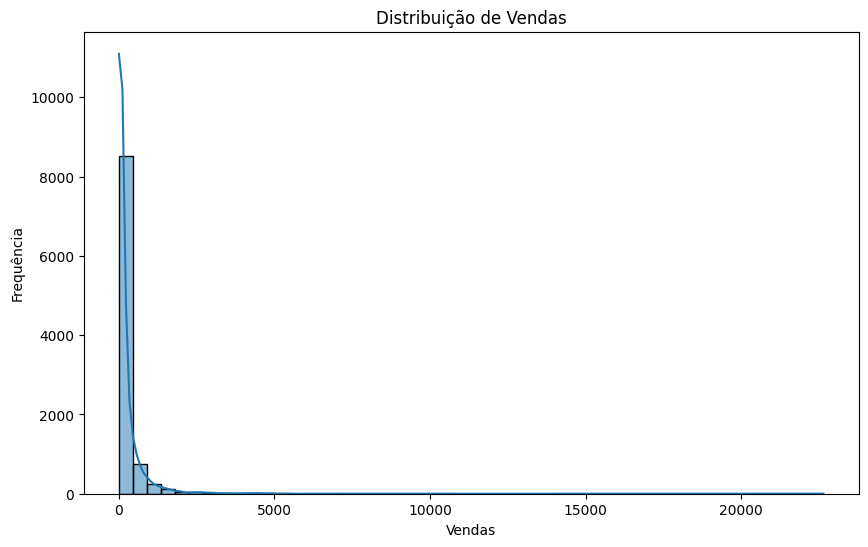

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['Sales'], bins=50, kde=True)
plt.title('Distribuição de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()


O gráfico acima apresenta a distribuição das vendas da Amazon, demonstrando a frequência de diferentes volumes de vendas. Através deste gráfico, podemos observar algumas características importantes relacionadas ao desempenho das vendas da empresa:

1. Compreensão mais profunda do desempenho das vendas da Amazon: O gráfico de distribuição nos permite visualizar como as vendas estão distribuídas, identificando a predominância de vendas de menor valor, com uma diminuição progressiva na frequência à medida que o valor das vendas aumenta. Isso sugere que a maioria das transações envolve produtos de menor valor, enquanto vendas de valor mais alto são menos frequentes.

2. Identificação de oportunidades de otimização e melhoria: Analisando a distribuição das vendas, podemos identificar áreas potenciais para otimização. Por exemplo, estratégias de marketing e promoções podem ser direcionadas para aumentar as vendas de produtos de maior valor, ou para converter vendas de menor valor em vendas de maior valor através de vendas cruzadas ou upselling.

3. Base para tomada de decisões estratégicas: Com a compreensão da distribuição das vendas, a Amazon pode tomar decisões estratégicas informadas, como ajustes de preços, planejamento de estoque e desenvolvimento de novos produtos. Isso pode incluir o foco em categorias de produtos que apresentam maior potencial de receita ou a revisão de estratégias de precificação para maximizar a lucratividade.

4. Melhoria da eficiência operacional e aumento da lucratividade: Ao identificar padrões nas vendas, a Amazon pode otimizar suas operações, como logística e gestão de estoque, para se alinhar melhor com a demanda dos consumidores. Isso não apenas melhora a eficiência operacional, mas também contribui para o aumento da lucratividade ao reduzir custos desnecessários e focar em produtos e estratégias que geram maior retorno.

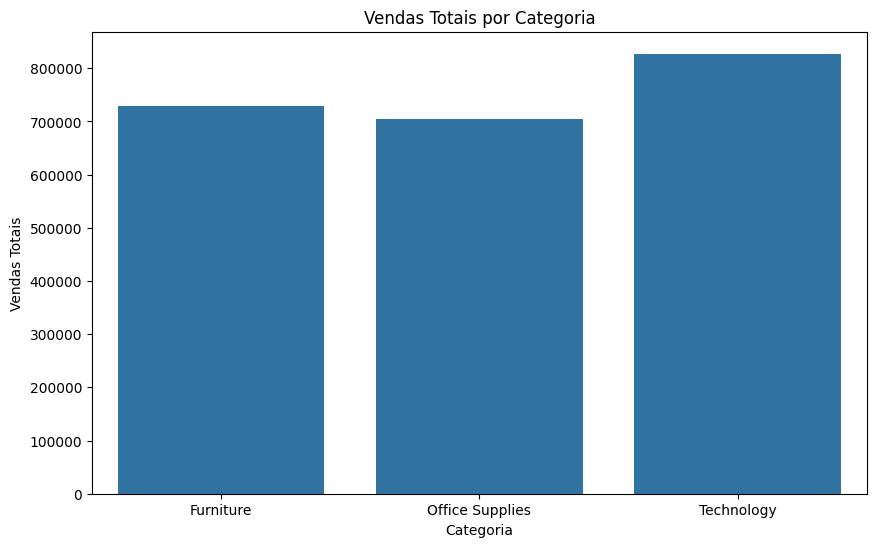

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Sales', data=dados, estimator=sum, ci=None)
    plt.title('Vendas Totais por Categoria')
    plt.xlabel('Categoria')
    plt.ylabel('Vendas Totais')
    plt.show()

O gráfico "Vendas Totais por Categoria da Amazon" ilustra a distribuição das vendas totais segregadas por categoria de produtos, proporcionando uma visão clara de quais categorias contribuem mais significativamente para as receitas totais da empresa. Este gráfico é fundamental para várias análises e ações estratégicas:

1. Identificação de categorias líderes: O gráfico facilita a identificação das categorias de produtos que geram mais vendas para a Amazon. Com essas informações, a empresa pode concentrar esforços de marketing, desenvolvimento de produtos, e otimização de estoque nessas áreas para maximizar a rentabilidade.

2. Oportunidades de diversificação: Ao analisar as categorias com desempenho inferior, a Amazon pode identificar oportunidades para diversificar suas ofertas. Isso pode incluir a expansão de linhas de produtos existentes ou a introdução de novas categorias para aumentar a participação de mercado e o crescimento das vendas.

3. Alocação eficiente de recursos: Compreendendo quais categorias são mais lucrativas, a Amazon pode alocar recursos de maneira mais eficiente, priorizando investimentos em marketing, pesquisa e desenvolvimento, e estoque nas categorias que oferecem o maior retorno sobre o investimento.

4. Estratégias de preços e promoções: O gráfico de vendas por categoria pode orientar a Amazon na definição de estratégias de preços e promoções. Categorias com alto volume de vendas podem se beneficiar de ajustes de preços estratégicos ou promoções direcionadas para aumentar ainda mais as vendas e a participação de mercado.

5. Análise competitiva: Compreender o desempenho de vendas por categoria ajuda a Amazon a realizar análises competitivas, identificando áreas em que a empresa domina o mercado ou enfrenta forte concorrência. Isso pode informar estratégias para fortalecer a posição da empresa em categorias-chave.

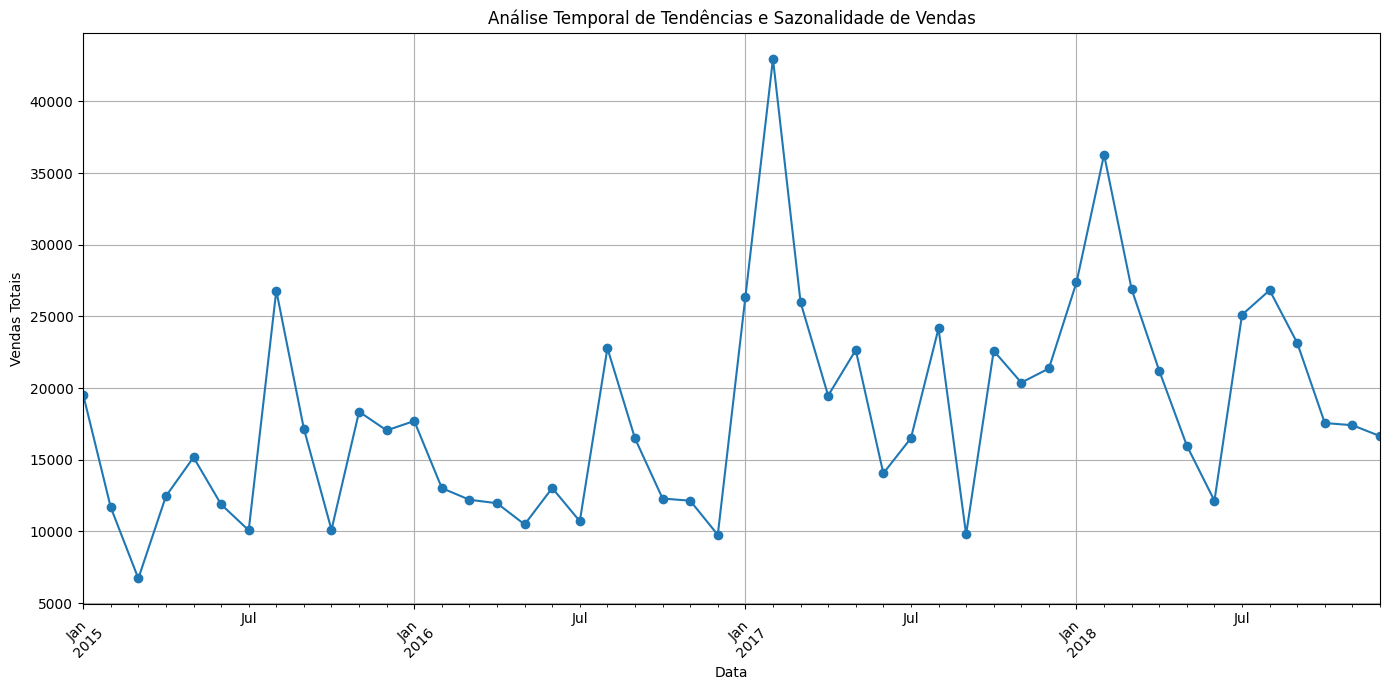

In [7]:
# Criando uma coluna apenas com o ano e mês
if 'Order Date' in dados.columns:
    dados['Order Date'] = pd.to_datetime(dados['Order Date'], errors='coerce')  # Convertendo e forçando datas inválidas para NaT
    dados = dados.dropna(subset=['Order Date'])  # Removendo linhas onde a data é NaT

    # Criando uma coluna apenas com o ano e mês
    dados['YearMonth'] = dados['Order Date'].dt.to_period('M')

    # Certificando-se de que a coluna 'Sales' é numérica
    if 'Sales' in dados.columns:
        dados['Sales'] = pd.to_numeric(dados['Sales'], errors='coerce')  # Convertendo e forçando valores inválidos para NaN
        dados = dados.dropna(subset=['Sales'])  # Removendo linhas onde as vendas são NaN

        # Agrupando os dados por ano e mês, somando as vendas
        monthly_sales = dados.groupby('YearMonth')['Sales'].sum()

        # Criando o gráfico de vendas mensais
        plt.figure(figsize=(14, 7))
        monthly_sales.plot(kind='line', marker='o', color='tab:blue')
        plt.title('Análise Temporal de Tendências e Sazonalidade de Vendas')
        plt.xlabel('Data')
        plt.ylabel('Vendas Totais')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()




O gráfico "Vendas da Amazon ao Longo do Tempo" mostra a evolução das vendas totais mês a mês, fornecendo uma visualização clara das tendências e variações sazonais nas vendas da empresa. A partir desse gráfico, podemos destacar vários insights importantes para a Amazon:

1. Análise de tendências: A linha do tempo mostra como as vendas variam ao longo dos meses, permitindo identificar padrões sazonais ou tendências de crescimento. Períodos de aumento nas vendas podem corresponder a datas comemorativas, lançamentos de novos produtos, ou campanhas promocionais.

2. Identificação de períodos de pico e baixa: É possível observar os meses em que as vendas atingem seus picos, bem como os períodos de menor desempenho. Essas informações são cruciais para planejar estratégias de estoque, marketing e vendas para maximizar a receita durante os picos e minimizar os impactos durante as baixas.

3. Base para estratégias de marketing e vendas: Compreender a variação das vendas ao longo do tempo ajuda a Amazon a desenvolver estratégias de marketing e vendas mais eficazes. Por exemplo, aumentar o foco em publicidade e promoções nos períodos que antecedem os picos de vendas pode potencializar ainda mais esses picos.

4. Otimização de operações e planejamento de estoque: A análise das tendências de vendas ao longo do tempo permite à Amazon otimizar suas operações, incluindo logística e gerenciamento de estoque, para atender adequadamente à demanda prevista. Isso minimiza tanto a escassez de produtos quanto o excesso de estoque, reduzindo custos e melhorando a satisfação do cliente.

5. Tomada de decisões estratégicas informadas: Os insights gerados pela análise das vendas ao longo do tempo podem orientar decisões estratégicas, como a expansão para novos mercados, ajustes de preços, ou o desenvolvimento de novos produtos e serviços. Identificar os períodos de maior lucratividade permite direcionar recursos de forma mais eficiente para áreas de alto retorno.

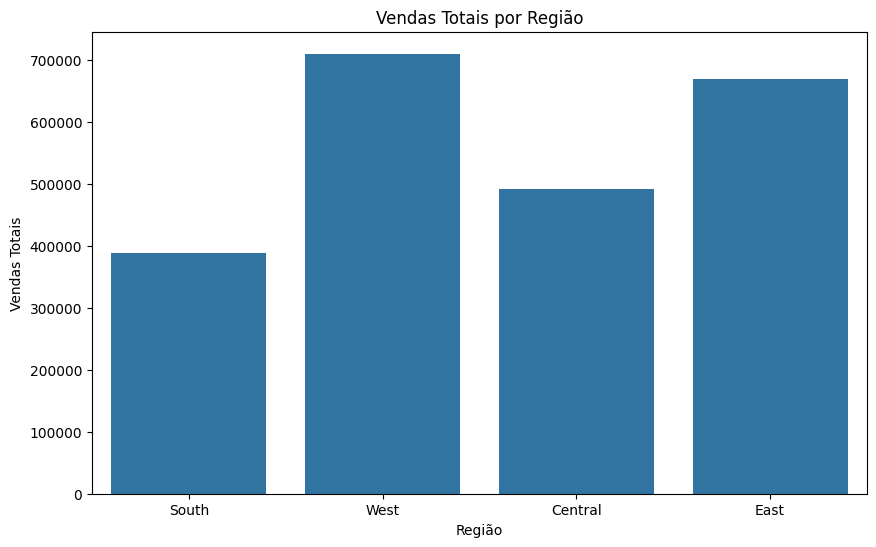

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Region', y='Sales', data=dados, estimator=sum, ci=None)
    plt.title('Vendas Totais por Região')
    plt.xlabel('Região')
    plt.ylabel('Vendas Totais')
    plt.show()

O gráfico "Vendas Totais por Região da Amazon" exibe a soma das vendas totais segmentadas por região geográfica, fornecendo uma visão valiosa de como o desempenho de vendas varia geograficamente. Este tipo de análise é essencial para o planejamento estratégico da Amazon por vários motivos:

1. Foco geográfico: Ao identificar as regiões com o maior volume de vendas, a Amazon pode direcionar esforços de marketing e alocação de recursos para essas áreas, buscando maximizar a eficácia de suas operações e aumentar a penetração de mercado.

2. Identificação de oportunidades de crescimento: Regiões com vendas menores podem representar oportunidades de crescimento. A Amazon pode investigar as causas do desempenho inferior nessas áreas e desenvolver estratégias específicas para aumentar a presença de mercado, como campanhas de marketing localizadas ou ajustes na logística e oferta de produtos.

3. Otimização da logística e da cadeia de suprimentos: Compreendendo as tendências de vendas por região, a Amazon pode otimizar sua logística e gestão da cadeia de suprimentos, melhorando a eficiência na distribuição de produtos e reduzindo os custos operacionais.

4. Personalização da oferta de produtos: O gráfico permite à Amazon identificar preferências de consumo regionais, possibilitando a personalização do portfólio de produtos oferecidos em cada região. Isso pode incluir a adaptação do estoque para atender demandas locais específicas, aumentando assim a satisfação do cliente e as vendas.

5. Análise competitiva regional: A análise das vendas por região ajuda a Amazon a compreender melhor o cenário competitivo em diferentes mercados. Identificar regiões onde a concorrência é mais intensa pode levar a estratégias direcionadas para fortalecer a posição da empresa nessas áreas.

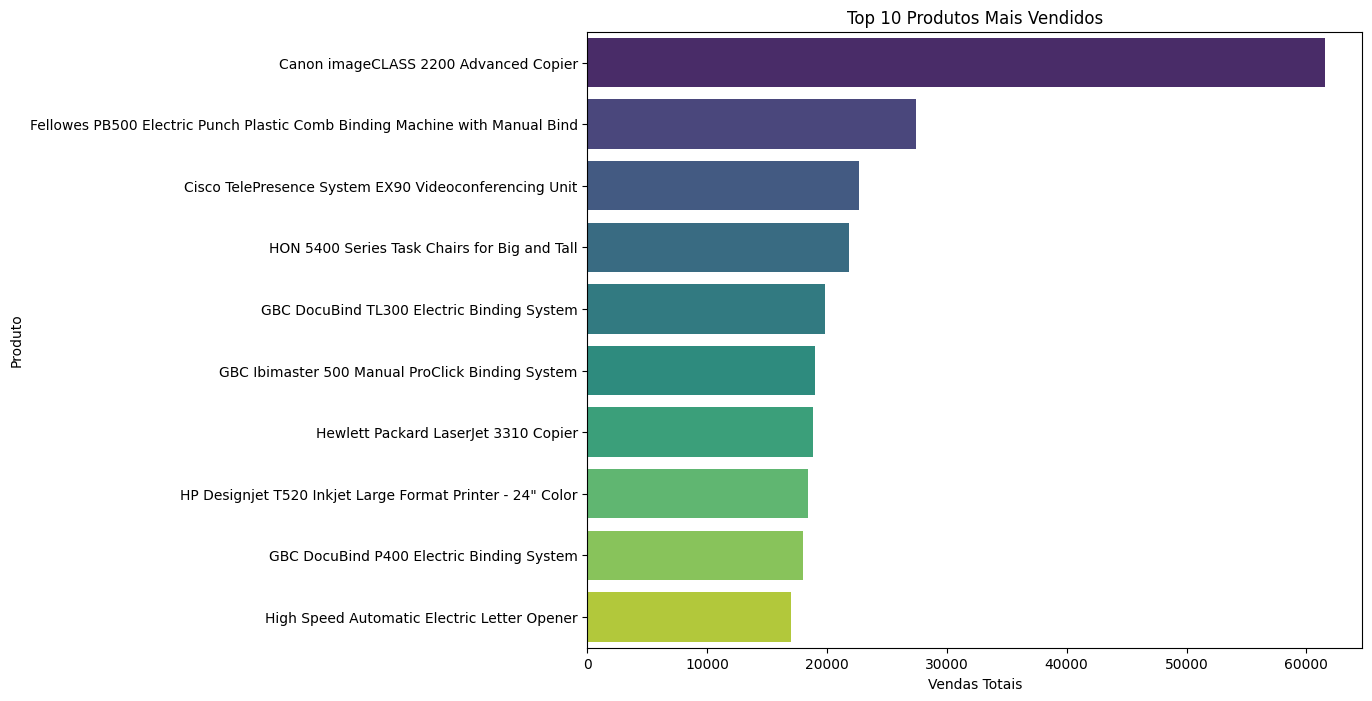

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    top_products = dados.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title('Top 10 Produtos Mais Vendidos')
    plt.xlabel('Vendas Totais')
    plt.ylabel('Produto')
    plt.show()

O gráfico "Top 10 Produtos Mais Vendidos da Amazon" destaca os produtos que alcançaram o maior volume de vendas totais, oferecendo insights valiosos sobre as preferências dos consumidores e o desempenho de produtos específicos. Este gráfico é especialmente útil para a Amazon por diversas razões:

1. Foco em produtos de alto desempenho: Ao identificar os produtos mais vendidos, a Amazon pode concentrar esforços de marketing e promocionais para continuar impulsionando as vendas desses itens, além de explorar oportunidades de cross-selling e upselling relacionadas.

2. Análise de tendências de consumo: A lista dos produtos mais vendidos reflete as tendências atuais de consumo e as preferências dos clientes. Essas informações podem orientar a Amazon na seleção de produtos a serem estocados e na identificação de potenciais novos produtos ou categorias a serem exploradas.

3. Otimização de estoque: Compreendendo quais produtos têm a maior demanda, a Amazon pode otimizar seu gerenciamento de estoque, assegurando que haja disponibilidade suficiente desses itens para atender à demanda dos consumidores e minimizar o risco de estoque excedente em produtos menos populares.

4. Desenvolvimento de produtos: Os insights sobre os produtos mais vendidos podem inspirar a Amazon a desenvolver produtos próprios que atendam às demandas do mercado ou a melhorar produtos existentes, aumentando sua competitividade e participação no mercado.

5. Estratégias de precificação: A análise das vendas dos produtos mais populares pode fornecer à Amazon dados valiosos para estratégias de precificação dinâmica, permitindo ajustar os preços de acordo com a demanda, competitividade do mercado e objetivos de lucratividade.

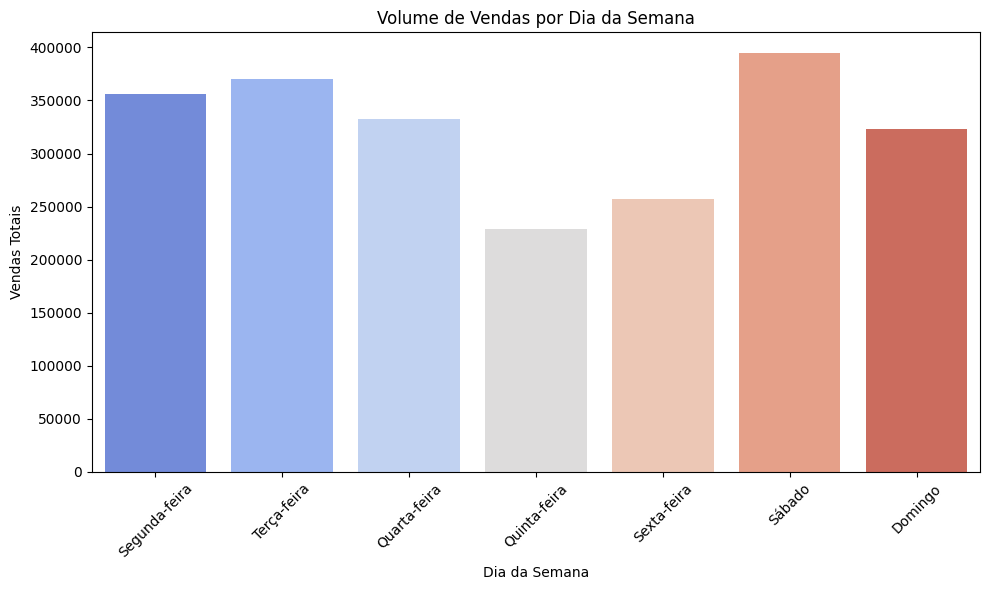

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    dados['Order Date'] = pd.to_datetime(dados['Order Date'])
    dados['Day of Week'] = dados['Order Date'].dt.day_name()

    sales_by_day = dados.groupby('Day of Week')['Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

    dias_da_semana_pt = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
    sales_by_day.index = dias_da_semana_pt

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='coolwarm')
    plt.title('Volume de Vendas por Dia da Semana')
    plt.xlabel('Dia da Semana')
    plt.ylabel('Vendas Totais')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

O gráfico "Volume de Vendas por Dia da Semana" ilustra o desempenho das vendas da Amazon ao longo dos dias da semana, do qual podemos extrair insights valiosos para aprimorar a gestão de vendas e estratégias de marketing. Aqui estão algumas considerações baseadas no gráfico:

1. Compreensão mais profunda do desempenho das vendas da Amazon: Ao observar o volume de vendas por dia, identificamos padrões que podem indicar preferências de compra dos consumidores e a eficácia de estratégias promocionais em diferentes dias.

2. Identificação de oportunidades de otimização e melhoria: Dias com vendas inferiores podem ser alvos para a implementação de promoções, descontos ou campanhas de marketing direcionadas, a fim de aumentar a atratividade e estimular vendas.

3. Base para tomada de decisões estratégicas: Com base nos dias de maior movimento, a Amazon pode ajustar preços, planejar melhor o estoque e organizar a logística de entrega para garantir a satisfação do cliente e eficiência operacional.

4. Melhoria da eficiência operacional e aumento da lucratividade: Entender os dias de pico permite à Amazon alocar recursos adequadamente, garantindo que a demanda seja atendida de forma eficiente, o que pode resultar em melhor satisfação do cliente e, por consequência, maior lucratividade.



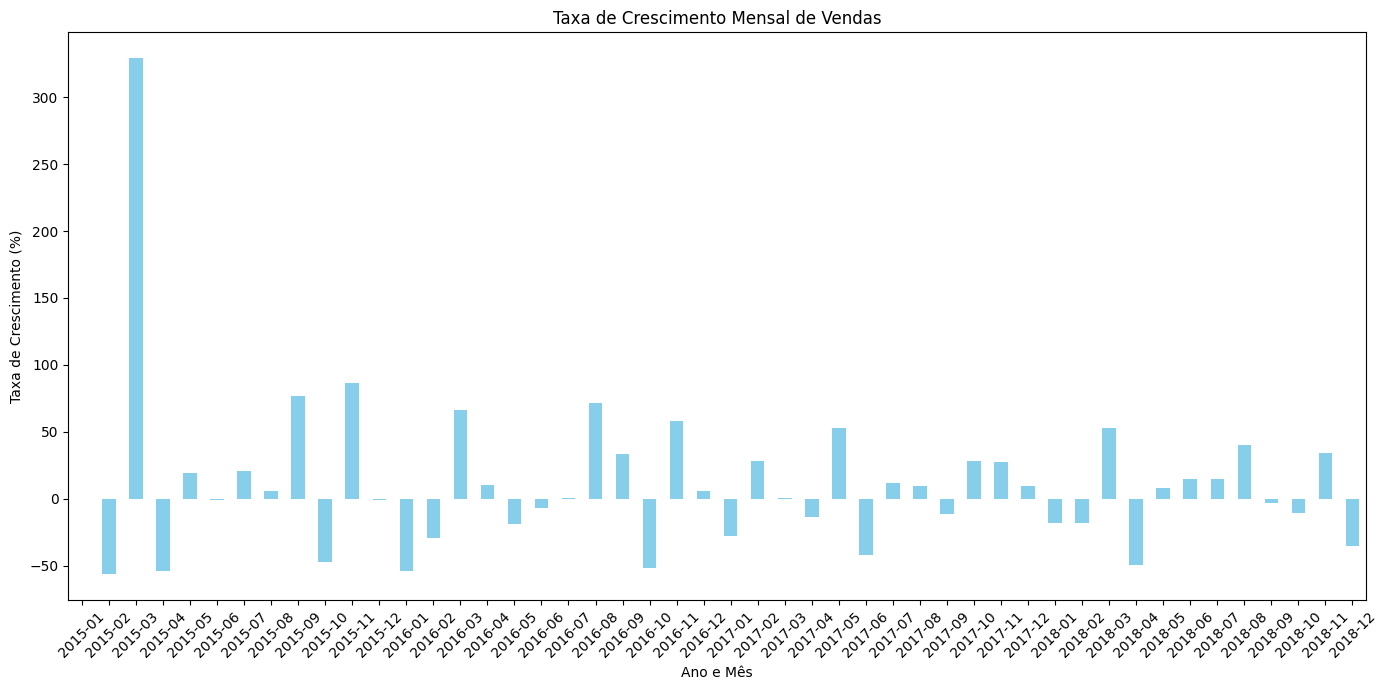

In [ ]:
# Converter 'Order Date' para datetime
dados['Order Date'] = pd.to_datetime(dados['Order Date'])

# Criar uma coluna apenas com o ano e mês
dados['YearMonth'] = dados['Order Date'].dt.to_period('M')

# Agrupar os dados por ano e mês, somando as vendas
monthly_sales = dados.groupby('YearMonth')['Sales'].sum()

# Calcular a taxa de crescimento mensal
monthly_growth_rate = monthly_sales.pct_change() * 100

# Configurar o ambiente para ignorar certos avisos
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Plotar o gráfico de taxa de crescimento mensal
    plt.figure(figsize=(14, 7))
    monthly_growth_rate.plot(kind='bar', color='skyblue')
    plt.title('Taxa de Crescimento Mensal de Vendas')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Taxa de Crescimento (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

O gráfico "Taxa de Crescimento Mensal de Vendas" destaca a evolução das vendas da Amazon mês a mês, oferecendo insights valiosos sobre a dinâmica de mercado e a eficácia das estratégias de vendas ao longo do tempo. Aqui estão alguns pontos chave que podem ser extraídos deste gráfico:

1. Acompanhamento da performance de vendas: A taxa de crescimento mensal das vendas permite uma análise detalhada da performance ao longo do tempo, identificando meses de alto e baixo desempenho, o que é crucial para ajustar estratégias de marketing e vendas.

2. Detecção de tendências e padrões sazonais: A visualização do crescimento mensal ajuda a identificar padrões sazonais, permitindo a otimização de estoque e a preparação para períodos de alta demanda.

3. Identificação de impacto de ações estratégicas: Alterações significativas na taxa de crescimento podem indicar o impacto de ações estratégicas, como campanhas de marketing, lançamentos de novos produtos, ou mudanças nos preços.

4. Orientação para tomada de decisões futuras: A análise da evolução das vendas e de sua taxa de crescimento é fundamental para planejar ações futuras, visando não apenas sustentar o crescimento, mas também superar os desafios identificados nos períodos de baixo desempenho.

# Resumo

Este resumo abrange uma análise estratégica detalhada do desempenho de vendas da Amazon, usando diversos gráficos para ilustrar pontos chave sobre distribuição de vendas, desempenho por categoria de produto, tendências e sazonalidade, desempenho por região geográfica, produtos mais vendidos, desempenho de vendas por dia da semana e taxa de crescimento mensal de vendas. Aqui estão os insights principais:

1. Distribuição de Vendas: A maioria das transações envolve produtos de menor valor, sugerindo a necessidade de estratégias para aumentar as vendas de produtos de maior valor através de marketing, vendas cruzadas ou upselling.

2. Vendas Totais por Categoria: Identifica categorias líderes em vendas, oferecendo oportunidades para concentrar esforços de marketing e desenvolvimento de produtos nessas áreas, enquanto categorias de menor desempenho representam potenciais áreas de crescimento.

3. Análise Temporal: Mostra variações sazonais e tendências de crescimento nas vendas ao longo do tempo, fundamental para planejar estratégias de estoque, marketing e vendas.

4. Vendas Totais por Região: Destaca a importância do foco geográfico, otimização da logística e personalização da oferta de produtos baseada em preferências regionais.

5. Top 10 Produtos Mais Vendidos: Oferece insights sobre preferências de consumo e tendências de mercado, útil para focar em produtos de alto desempenho e para o desenvolvimento de estratégias de produto e precificação.

6. Volume de Vendas por Dia da Semana: Revela padrões de compra dos consumidores durante a semana, indicando oportunidades para promoções e ajustes logísticos para melhorar a eficiência e a lucratividade.

7. Taxa de Crescimento Mensal de Vendas: Fornece uma visão sobre a eficácia das estratégias de vendas e marketing ao longo do tempo, destacando a importância da detecção de tendências e padrões sazonais para planejamento futuro.

Essa análise abrangente destaca a importância de uma abordagem multifacetada para entender e melhorar o desempenho de vendas, incluindo a otimização de estratégias de marketing, o planejamento de estoque baseado em tendências sazonais, a personalização de ofertas por região e o foco em produtos de alto desempenho.








Palavras Chaves: Análise Estratégica de Vendas, Desempenho de Vendas da Amazon, Distribuição de Vendas, Desempenho por Categoria de Produto, Tendências e Sazonalidade de Vendas

# ABSTRACT

This summary encapsulates a comprehensive strategic analysis of Amazon's sales performance, utilizing various charts to highlight key insights on sales distribution, performance by product category, trends and seasonality, performance by geographical region, top-selling products, sales performance by day of the week, and monthly sales growth rate. Here are the main insights:

1. Sales Distribution: The majority of transactions involve lower-value products, suggesting strategies are needed to boost sales of higher-value products through marketing, cross-selling, or upselling.

2. Total Sales by Category: Identifies leading sales categories, offering opportunities to focus marketing and product development efforts in these areas, while lower-performing categories represent potential growth opportunities.

3. Temporal Analysis: Shows seasonal variations and growth trends in sales over time, crucial for planning stock, marketing, and sales strategies.

4. Total Sales by Region: Highlights the importance of geographical focus, logistics optimization, and product offer customization based on regional preferences.

5. Top 10 Best Selling Products: Provides insights into consumer preferences and market trends, useful for focusing on high-performance products and for developing product and pricing strategies.

6. Sales Volume by Day of the Week: Reveals consumer purchasing patterns throughout the week, indicating opportunities for promotions and logistical adjustments to improve efficiency and profitability.

7. Monthly Sales Growth Rate: Offers a view on the effectiveness of sales and marketing strategies over time, emphasizing the importance of detecting trends and seasonal patterns for future planning.

This analysis underscores the significance of a multifaceted approach to understanding and enhancing sales performance, including optimizing marketing strategies, planning inventory based on seasonal trends, customizing offerings by region, and focusing on high-performance products.

Keywords: Strategic Sales Analysis, Amazon Sales Performance, Sales Distribution, Performance by Product Category, Sales Trends and Seasonality

# LISTA DE ABREVIATURAS

1. AED: Análise Estratégica de Desempenho
2. IV Amazon: Insights de Vendas da Amazon
3. plt: matplotlib.pyplot (biblioteca de visualização de dados em Python)
4. sns: seaborn (biblioteca de visualização de dados em Python)
5. dados: conjunto de dados
6. Sales: Vendas
7. Freq.: Frequência
8. Est.: Estimador
9. ci: Intervalo de Confiança
10. Reg.: Região
11. Prod.: Produto
12. Dia Sem.: Dia da Semana
13. Taxa Cresc.: Taxa de Crescimento

# CONSIDERAÇÕES FINAIS

A análise estratégica de desempenho das vendas da Amazon proporciona uma visão abrangente e detalhada do comportamento do mercado, permitindo à empresa tomar decisões informadas para impulsionar sua competitividade e maximizar sua lucratividade. Os insights obtidos através dos gráficos apresentados revelam diversas oportunidades e desafios que a Amazon enfrenta em seu ambiente operacional.

Primeiramente, ao examinar a distribuição das vendas, notamos uma predominância de transações envolvendo produtos de menor valor, o que sugere a necessidade de estratégias para aumentar as vendas de itens de valor mais alto. Além disso, a análise por categoria de produtos destaca áreas de alto desempenho, indicando onde a empresa pode concentrar seus esforços para maximizar o retorno sobre o investimento e identificar oportunidades de diversificação.

A análise temporal das vendas revela padrões sazonais e tendências de crescimento, permitindo à Amazon antecipar e responder de forma proativa às flutuações no mercado. A compreensão das preferências de compra dos consumidores ao longo dos dias da semana também oferece insights valiosos para a otimização das estratégias de marketing e vendas.

Por fim, a análise da taxa de crescimento mensal das vendas fornece uma visão dinâmica do desempenho da empresa, identificando áreas de oportunidade para ajustes estratégicos e avaliando o impacto de iniciativas anteriores.